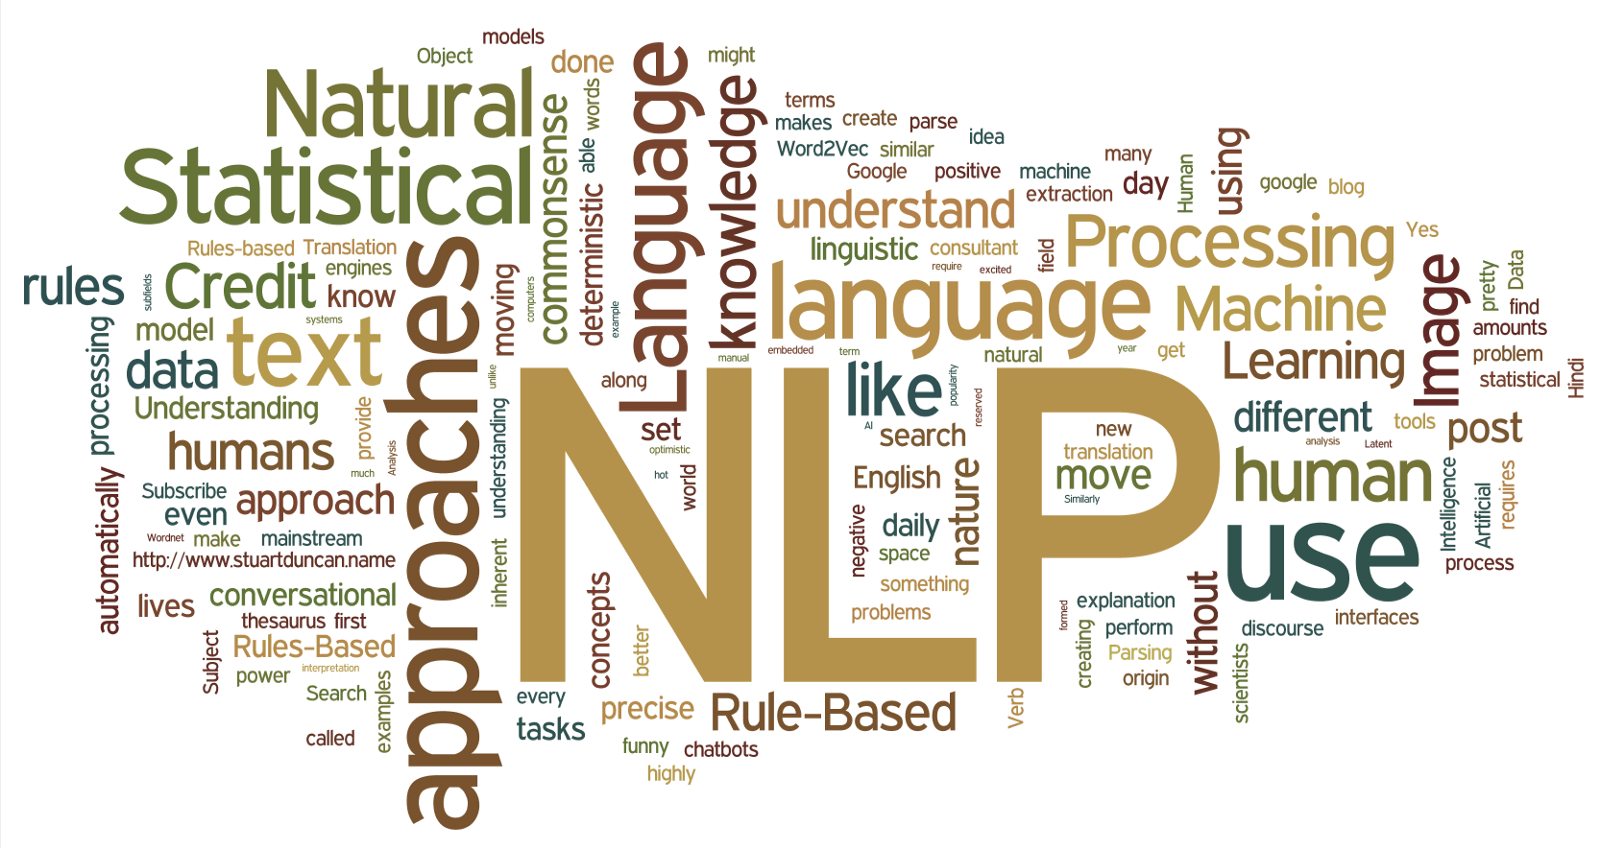

# What is NLP?

Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

Natural Language Processing, or NLP for short, is broadly defined as the automatic manipulation of natural language, like speech and text, by software.

Some Examples :
- Cortana
- Siri
- Gmail (Spam filtering)

The study of natural language processing has been around for more than 50 years and grew out of the field of linguistics with the rise of computers.

**Before we get into details of NLP first let us try to answer the below question**

### So...How is NLP different from other types of data?

Natural language refers to the way we, humans, communicate with each other namely speech and text.We are surrounded by text. Think about how much text you see each day:

- Signs<br>
- Menus<br>
- Email<br>
- SMS<br>
- Web Pages<br><br>
and so much more…

The list is endless.

Now think about speech.We may speak to each other, as a species, more than we write. It may even be easier to learn to speak than to write.Voice and text are how we communicate with each other. Given the importance of this type of data, we must have methods to understand and reason about natural language, just like we do for other types of data.

# Reader's Note

1. This notebook is divided into two parts. Welcome to Pt.1.

2. After reading this notebook, you’ll know some basic techniques to extract features from some text, so you can use these features as input for machine learning models.

2. As the title suggest, this notebook will provide a walkthrough on all basic concepts of NLP that everyone who is stepping into or has already stepped into NLP, should know.

3. If you are just a beginner in NLP,  this is the perfect notebook to start from. 

4. If you are already somewhat familiar to NLP, then this is a good notebook to brush up ypur concepts.

5. I will be using the very famous **NLTK** library throughout this notebook.

**<font color = 'red'>If you like this kernel 😊 then please show some love ❤️ and upvote it 👍. It really motivates me to work even harder and bring you guys more such quality content.</font>**

# Index
1. Introduction to NLTK
2. Importing the relevant library
3. Tokenizing Words & Sentences
4. Stopwords
5. Part of Speech(POS) Tagging  
6. Stemming Words
7. Lemmatization 
8. Chunking
9. Chinking
10. Named Entity Recognition
11. References

### 1. Introduction to NLTK

NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”

In our path to learning how to do sentiment analysis with NLTK, we're going to learn the following:

- Tokenizing - Splitting sentences and words from the body of text.
- Part of Speech tagging
- Machine Learning with the Naive Bayes classifier
- How to tie in Scikit-learn (sklearn) with NLTK
- Training classifiers with datasets
- Performing live, streaming, sentiment analysis with Twitter.<br>
<br>...and much more.

So now, lets get into details of this tutorial...

### 2. Importing the relevant library

As mentioned, we will be using the very famous NLTK library. So let's import it first of all

In [ ]:
import nltk

### 3. Tokenizing Words & Sentences

Tokenization is the process of breaking up the given text into units called tokens. The tokens may be words or number or punctuation mark or even sentences. Tokenization does this task by locating word boundaries. Ending point of a word and beginning of the next word is called word boundaries. Tokenization is also known as word segmentation.

Challenges in tokenization depends on the type of language. Languages such as English and French are referred to as space-delimited as most of the words are separated from each other by white spaces. Languages such as Chinese and Thai are referred to as unsegmented as words do not have clear boundaries. Tokenising unsegmented language sentences requires additional lexical and morphological information. Tokenization is also affected by writing system and the typographical structure of the words. Structures of languges can be grouped into three categories:

**Isolating**: Words do not divide into smaller units. Example: Mandarin Chinese

**Agglutinative**: Words divide into smaller units. Example: Japanese, Tamil

**Inflectional**: Boundaries between morphemes are not clear and ambiguous in terms of grammatical meaning. Example: Latin.

Let us understand some more basic terminology.

**What is Corpora?**<br>
It is a body of text e.g Medical journal, Presidential speech, English language

**What is Lexicon?**<br>
Lexicon is nothing but words and their means .E.g Investor speak vs. Regular English speak

i.e Investor talk about "BULL" as some stock going positive in the market which bullish as to the regular word of "BULL" describing the usual animal.

So in simple for now let us look at Word Tokenizer and Sentence Tokenizer using NLTK.

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize

example = "Hi there!! How are you doing. I am doing just fine. Hope you like this kernel."
# tokenizing each word in example text
print(word_tokenize(example))

In [ ]:
# tokenizing each sentence in example text
print(sent_tokenize(example))

### 4. Stopwords
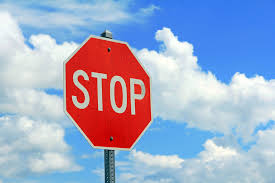

Stopwords are natural language words which have very little meaning, such as "and", "the", "a", "an", and similar words.

Basically during the pre processing of natural language text we eliminate the stopwords as they are redundant and do not convey any meaning insight in the data.

Lets have a look at stopwords present in English stopwords corpora...

In [ ]:
from nltk.corpus import stopwords

STOPWORDS = stopwords.words('english')
print(STOPWORDS)

If we have a closer look at the stopwords list, we can see that it includes words only in lowercase. So we have to be very careful to first convert our text to lowercase before removing stopwords. Otherwise, some stopwords will slide in while building our model and may affect its accuracy or prediction power.

Now let's see how to remove stopwords from text...

In [ ]:
example = "Hi there I am Sarthak Rana!! How are you doing. I am doing just fine. Hope you learn a lot from this kernel."

#convert to lowercase
example = example.lower()
print("Length of text before removing stopwords : {0}".format(len(example.split())))

# remove stopwords
[word for word in example.split() if word not in STOPWORDS]

In [ ]:
print("Length of text after removing stopwords : {0}".format(len([word for word in example.split() if word not in STOPWORDS])))

#### **There are only 9 words left after removing stopwords compared to 23 in text. This is so as all stopwords(irrelevant words) have been removed from text. We now see how important it is to remove stopwords. Otherwise, our model would have trained with 14 extra irrelevant words.**

Lets see this for multiple text sentences...

In [ ]:
example = ["Hi there I am Sarthak Rana!! How are you doing. I am doing just fine. Hope you like this kernel.", 
           "Today was a very great day. I got promoted. Might surprise my girl with a present :P"]

lowercase_example = []
for text in example:
    lowercase_example.append(text.lower())

[[word for word in sentence.split() if word not in STOPWORDS] for sentence in lowercase_example]

### 5. Part-Of-Speech Tagging (POS Tagging)

One of the more powerful aspects of the NLTK is the Part of Speech tagging that it can do. This means labeling words in a sentence as nouns, adjectives, verbs...etc. Even more impressive, it also labels by tense, and more. Here's a list of the tags, what they mean, and some examples:

POS Tag List :
* CC coordinating conjunction
* CD cardinal digit
* DT determiner
* EX existential there (like: "there is" ... think of it like "there exists")
* FW foreign word
* IN preposition/subordinating conjunction
* JJ adjective 'big'
* JJR adjective, comparative 'bigger'
* JJS adjective, superlative 'biggest'
* LS list marker 1)
* MD modal could, will
* NN noun, singular 'desk'
* NNS noun plural 'desks'
* NNP proper noun, singular 'Harrison'
* NNPS proper noun, plural 'Americans'
* PDT predeterminer 'all the kids'
* POS possessive ending parent\'s
* PRP personal pronoun I, he, she
* PRPdollar possessive pronoun my, his, hers
* RB adverb very, silently,
* RBR adverb, comparative better
* RBS adverb, superlative best
* RP particle give up
* TO to go 'to' the store.
* UH interjection errrrrrrrm
* VB verb, base form take
* VBD verb, past tense took
* VBG verb, gerund/present participle taking
* VBN verb, past participle taken
* VBP verb, sing. present, non-3d take
* VBZ verb, 3rd person sing. present takes
* WDT wh-determiner which
* WP wh-pronoun who, what
* WPdollar possessive wh-pronoun whose
* WRB wh-abverb where, when

In [ ]:
from nltk import pos_tag

<font color = 'red'> REMEMBER ! A POS tagger requires a list of tokens to perform tagging. So always remember to perform tokenization step prior to tagging.</font>

In [ ]:
# with single example
print("WITH SINGLE TEXT\n")
example = "John is an intelligent individual. He intelligently does smart work. He is a top performer at Google."
example = word_tokenize(example)
print(pos_tag(example))

In [ ]:
# With multiple examples
print("\nWITH MULTIPLE TEXTS\n")
example_list = ["Hi there I am Sarthak Rana!! How are you doing. I am doing just fine. Hope you like this kernel.", 
               "Today was a very great day. I got promoted. Might surprise my girl with a present!!"]
for example in example_list:
    example = word_tokenize(example)
    print(pos_tag(example))

### 6. Stemming
Stemming is the process of reducing infected or derived words to their word stem,base or root form. It basically affixes to suffixes and prefixes or to the roots of words known as a lemma.It is also a preprocessing step in natural language processing.

Examples: Words like

- **organise, organising ,organisation** the root of its stem is organis.
- **intelligence,intelligently** the root of its stem is intelligen.

So stemming produces intermediate representation of the word which may not have any meaning.In this case "intelligen" has no meaning.

The idea of stemming is a sort of normalizing method. Many variations of words carry the same meaning, other than when tense is involved.

The reason why we stem is to shorten the lookup, and normalize sentences.

One of the most popular stemming algorithms is the Porter stemmer, which has been around since 1979.

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
text = "John is an intelligent individual. He intelligently does smart work. He is a top performer in the company."
[stemmer.stem(word) for word in text.split()]

### 7. Lemmatization
It is same as stemming process but the intermediate representation/root has a meaning.It is also a preprocessing step in natural language processing.

Examples: Words like

- **going ,goes,gone** - when we do lemmatization we get "go"
- **intelligence,intelligently** - when we do lemmatization we get "intelligent".

So lemmatization produces intermediate representation of the word which has a meaning.In this case "intelligent" has meaning.

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
example = "John is an intelligent individual. He intelligently does smart work. He is a top performer at Google."
[lemmatizer.lemmatize(word) for word in word_tokenize(example)]

# Wait, what.... ?

### There are 2 things to focus on...

#### <font color = 'blue'> 1. Performing Lemmatization gave the same result as the example text we used.</font>
#### <font color = 'blue'> 2. After going through stemming and lemmatization, you might have observed that these both were supposed to perform the same job -- convert the word to its root/ canonical form.</font>


**Coming to the first point..**<br><br>
This happened so because Lemmatization requires tokenization and POS tagging as first steps in order to perform conversion. Lemmatization algorithm, before rooting the word, looks at the context in which the word has been used in the text and then roots accordingly. Thus, the resultant words formed after Lemmatization have a meaning (unlike words formed from Stemming which have no meaning).

So, let's perform Lemmatization again now with the correct approach ...

In [ ]:
lemmatizer = WordNetLemmatizer()
example = "John is an intelligent individual. He intelligently does smart work. He is a top performer at Google."
example = word_tokenize(example)
lemmatized_tokens = []
for token, tag in pos_tag(example):
    if tag.startswith('NN'):
        pos = 'n'
    elif tag.startswith('VB'):
        pos = 'v'
    else:
        pos = 'a' 
    lemmatized_tokens.append(lemmatizer.lemmatize(token, pos))

In [ ]:
lemmatized_tokens

**Coming to the second point...**<br>
#### You may be asking yourself when should I use Stemming and when should I use Lemmatization? 

The answer itself is in whatever you have learned from this notebook. You have seen the following points:

- Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.

- Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used WordNet corpus and a corpus for stop words as well to produce lemma which makes it slower than stemming. You also had to define a parts-of-speech to obtain the correct lemma.

### The Speed v/s Accuracy Trade-off

The above points show that if speed is focused then stemming should be used since lemmatizers scan a corpus which consumed time and processing. It depends on the application you are working on that decides if stemmers should be used or lemmatizers. If you are building a language application in which language is important you should use lemmatization as it uses a corpus to match root forms.

### So choose wisely :)

### 8. Chunking

Now that we know the parts of speech, we can do what is called chunking, and group words into hopefully meaningful chunks. One of the main goals of chunking is to group into what are known as "noun phrases." These are phrases of one or more words that contain a noun, maybe some descriptive words, maybe a verb, and maybe something like an adverb. The idea is to group nouns with the words that are in relation to them.

In order to chunk, we combine the part of speech tags with regular expressions. Mainly from regular expressions, we are going to utilize the following:

"+" = match 1 or more

"?" = match 0 or 1 repetitions.

"*" = match 0 or MORE repetitions

"." = Any character except a new line

The last things to note is that the part of speech tags are denoted with the "<" and ">" and we can also place regular expressions within the tags themselves, so account for things like "all nouns" (<N.*>)

Let's include chunking for noun plural (NNS) and adjective (JJ)...

In [ ]:
from nltk.tokenize import PunktSentenceTokenizer

# Now, let's create our training and testing data:
train_txt="Crocodiles (subfamily Crocodylinae) or true crocodiles are large aquatic reptiles that live throughout the tropics in Africa, Asia, the Americas and Australia. Crocodylinae, all of whose members are considered true crocodiles, is classified as a biological subfamily. A broader sense of the term crocodile, Crocodylidae that includes Tomistoma, is not used in this article. The term crocodile here applies to only the species within the subfamily of Crocodylinae. The term is sometimes used even more loosely to include all extant members of the order Crocodilia, which includes the alligators and caimans (family Alligatoridae), the gharial and false gharial (family Gavialidae), and all other living and fossil Crocodylomorpha."
sample_text ="Crocodiles are large aquatic reptiles which are carnivorous.Allegators belong to this same reptile species"

# Next, we can train the Punkt tokenizer like:
cust_tokenizer = PunktSentenceTokenizer(train_txt)

# Then we can actually tokenize, using:

tokenized = cust_tokenizer.tokenize(sample_text)
print("Chunked Output")
def process_text():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkGram = r"""Chunk:{<NNS.?>*<JJ>+}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            print(chunked)

    except Exception as e:
        print(str(e))

process_text()

### 9. Chinking

You may find that, after a lot of chunking, you have some words in your chunk you still do not want, but you have no idea how to get rid of them by chunking. You may find that chinking is your solution.

Chinking is a lot like chunking, it is basically a way for you to remove a chunk from a chunk. The chunk that you remove from your chunk is your chink.

The code is very similar, you just denote the chink, after the chunk, with }...{ instead of the chunk's {...}

In [ ]:
# Now, let's create our training and testing data:
train_txt="Crocodiles (subfamily Crocodylinae) or true crocodiles are large aquatic reptiles that live throughout the tropics in Africa, Asia, the Americas and Australia. Crocodylinae, all of whose members are considered true crocodiles, is classified as a biological subfamily. A broader sense of the term crocodile, Crocodylidae that includes Tomistoma, is not used in this article. The term crocodile here applies to only the species within the subfamily of Crocodylinae. The term is sometimes used even more loosely to include all extant members of the order Crocodilia, which includes the alligators and caimans (family Alligatoridae), the gharial and false gharial (family Gavialidae), and all other living and fossil Crocodylomorpha."
sample_text ="Crocodiles are large aquatic reptiles which are carnivorous.Allegators belong to this same reptile species"

# Next, we can train the Punkt tokenizer like:
cust_tokenizer = PunktSentenceTokenizer(train_txt)

# Then we can actually tokenize, using:

tokenized = cust_tokenizer.tokenize(sample_text)

print("Chinked Output")
def process_text():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkGram = r"""Chunk: {<.*>+}
                                    }<VB.?|IN|DT|TO>+{"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            print(chunked)

    except Exception as e:
        print(str(e))

process_text()

### 10. Named Entity Recognition

One of the most major forms of chunking in natural language processing is called "Named Entity Recognition." The idea is to have the machine immediately be able to pull out "entities" like people, places, things, locations, monetary figures, and more.

This can be a bit of a challenge, but NLTK is this built in for us. There are two major options with NLTK's named entity recognition: either recognize all named entities **(binary = True)**, or recognize named entities as their respective type, like people, places, locations, etc. **(binary = False)**

Following are the NE in python NLTK library:

- NE Type and Examples<br>
- ORGANIZATION - Georgia-Pacific Corp., WHO<br>
- PERSON - Eddy Bonte, President Obama<br>
- LOCATION - Murray River, Mount Everest<br>
- DATE - June, 2008-06-29<br>
- TIME - two fifty a m, 1:30 p.m.<br>
- MONEY - 175 million Canadian Dollars, GBP 10.40<br>
- PERCENT - twenty pct, 18.75 %<br>
- FACILITY - Washington Monument, Stonehenge<br>
- GPE - South East Asia, Midlothian<br>

In [ ]:
# Now, let's create our training and testing data:
train_txt="Crocodiles (subfamily Crocodylinae) or true crocodiles are large aquatic reptiles that live throughout the tropics in Africa, Asia, the Americas and Australia. Crocodylinae, all of whose members are considered true crocodiles, is classified as a biological subfamily. A broader sense of the term crocodile, Crocodylidae that includes Tomistoma, is not used in this article. The term crocodile here applies to only the species within the subfamily of Crocodylinae. The term is sometimes used even more loosely to include all extant members of the order Crocodilia, which includes the alligators and caimans (family Alligatoridae), the gharial and false gharial (family Gavialidae), and all other living and fossil Crocodylomorpha."
sample_text ="Crocodiles are large aquatic reptiles which are carnivorous.Allegators belong to this same reptile species"

# Next, we can train the Punkt tokenizer like:
cust_tokenizer = PunktSentenceTokenizer(train_txt)

# Then we can actually tokenize, using:

tokenized = cust_tokenizer.tokenize(sample_text)

print("Named Entity Output")
def process_text():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged,binary = True)
            print(namedEnt)

    except Exception as e:
        print(str(e))

process_text()

### 11. References :-
- https://pythonprogramming.net/chunking-nltk-tutorial/
2. https://pythonprogramming.net/chinking-nltk-tutorial/
3. https://pythonprogramming.net/named-entity-recognition-nltk-tutorial/
4. https://www.guru99.com/pos-tagging-chunking-nltk.html
5. https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63
6. **MUST READ **- https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

# End Note

Hi everyone. There are a lot of things which I learnt while writing this kernel and there are still a lot of concepts left untouched. Kaggle provides us with the opportunity to learn and grow through kernels/notebooks sharing and a wide variety of datasets. Here is my contribution to the Kaggle community. I promise to keep putting kernels for everyone to learn and to learn myself and to comeback each time with more and more knowledge, concepts and implementations.

If you have any doubts, feedbacks or concerns, feel free to comment down below and I will try to get back to you as soon as possible. It would be great if you find any mistakes and point them out in comments... I will try to resolve them ASAP.

**<font color = 'red'>If you like this kernel 😊 then please show some love ❤️ and upvote it 👍. It really motivates me to work even harder and bring you guys more such quality content.</font>**

### Stay tuned for Part 2 . In Pt.2 we will see much more complex concepts using NLTK....